In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("D:GC/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

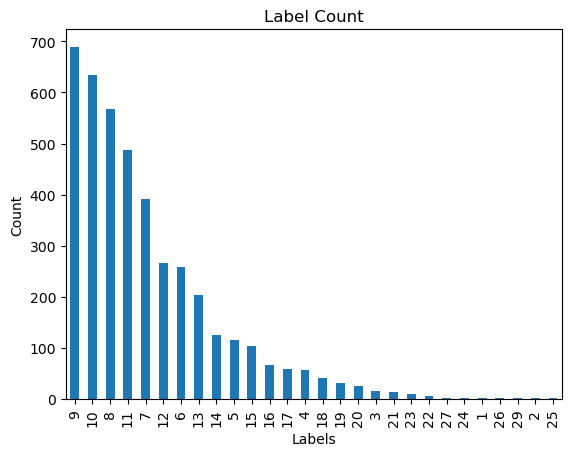

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [6]:
df=df.drop('Sex',axis=1)
df=df.drop('id',axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
df['Rings'] = label_encoder.fit_transform(df['Rings'])

# 'label' 컬럼을 숫자로 변환


In [8]:
y=df['Rings']
y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4177, dtype: int64

In [9]:
X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,random_state=21)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3132, 7), (1045, 7), (3132,), (1045,))

In [12]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [13]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test]

In [14]:
n_step = 3

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3130, 3, 7) (3130,)
(1043, 3, 7) (1043,)


In [15]:
from keras.utils import to_categorical


y_train_seq = to_categorical(y_train_seq, num_classes=28)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(3130, 28)
(1043, 28)


In [17]:
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 7 28


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [19]:
model = Sequential([
    Conv1D(128, kernel_size=1, activation='relu', input_shape = (n_timesteps,n_features)),
    MaxPooling1D(pool_size=1),
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(n_outputs, activation='softmax')  # 다중 클래스 분류 문제이므로 softmax
])

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 3, 128)              │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,452 (91.61 KB)

 Trainable params: 23,452 (91.61 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1426 - loss: 2.9093 - val_accuracy: 0.1885 - val_loss: 2.4277
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1755 - loss: 2.3858 - val_accuracy: 0.1757 - val_loss: 2.2577
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2051 - loss: 2.2913 - val_accuracy: 0.2204 - val_loss: 2.1876
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2362 - loss: 2.1985 - val_accuracy: 0.2236 - val_loss: 2.1865
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2319 - loss: 2.1954 - val_accuracy: 0.2460 - val_loss: 2.1334
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2168 - loss: 2.1998 - val_accuracy: 0.2460 - val_loss: 2.1403
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2223 - loss: 2.1513 - val_accuracy: 0.2396 - val_loss: 2.0984
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2488 - loss: 2.1406 - val_accuracy: 0.2236 - val_loss:

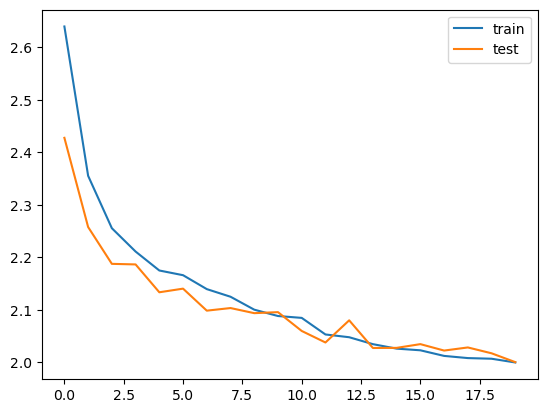

In [23]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [24]:
model.evaluate(X_train_seq, y_train_seq)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2720 - loss: 1.9786


[1.9810616970062256, 0.2715654969215393]

In [25]:
model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2275 - loss: 2.1080


[2.0673110485076904, 0.23202301561832428]

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix


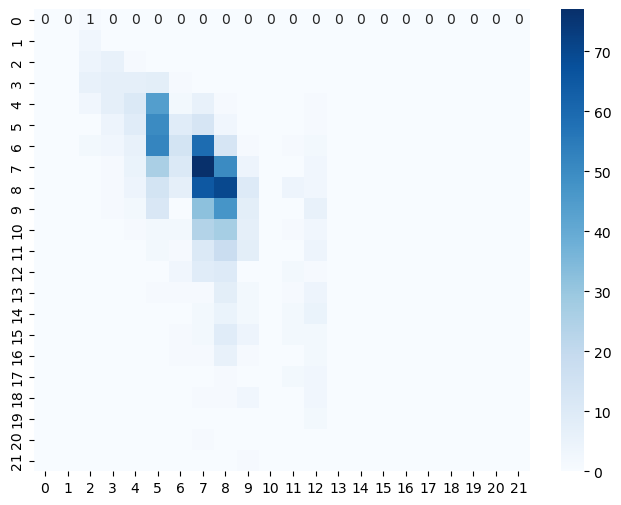

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [27]:

base_loss,base_accuracy=model.evaluate(X_test_seq, y_test_seq)

model_file='D:GC/abalone.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2275 - loss: 2.1080


model saved at  D:GC/abalone.h5
Accuracy >23.202302
Base Loss >2.07


In [28]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [29]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2275 - loss: 2.1080 


[2.0673110485076904, 0.23202301561832428]

In [30]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  7


In [34]:
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가
new_model.add(layers.Dense(28, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28)                  │          23,452 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28)                  │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,128 (105.97 KB)

 Trainable params: 3,676 (14.36 KB)

 Non-trainable params: 23,452 (91.61 KB)

In [35]:

import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Sequential name=sequential, built=True>",sequential,False
1,"<Dense name=dense_4, built=True>",dense_4,True
2,"<Dense name=dense_5, built=True>",dense_5,True


In [36]:

history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1755 - loss: 0.0000e+00 - val_accuracy: 0.2492 - val_loss: 0.0000e+00
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1963 - loss: 0.0000e+00 - val_accuracy: 0.1853 - val_loss: 0.0000e+00
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2027 - loss: 0.0000e+00 - val_accuracy: 0.2428 - val_loss: 0.0000e+00
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 0.0000e+00 - val_accuracy: 0.2364 - val_loss: 0.0000e+00
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2523 - loss: 0.0000e+00 - val_accuracy: 0.2364 - val_loss: 0.0000e+00
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 0.0000e+00 - val_accuracy: 0.2396 - val_loss: 0.0000e+00
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 0.0000e+00 - val_accuracy: 0.2396 - val_loss: 0.0000e+00
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28)                  │          23,452 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28)                  │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,482 (134.70 KB)

 Trainable params: 3,676 (14.36 KB)

 Non-trainable params: 23,452 (91.61 KB)

 Optimizer params: 7,354 (28.73 KB)

In [37]:

new_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 0.0000e+00


[0.0, 0.0, 0.25023970007896423, 0.25023970007896423]

In [38]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [39]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Sequential name=sequential, built=True>",sequential,True
1,"<Dense name=dense_4, built=True>",dense_4,True
2,"<Dense name=dense_5, built=True>",dense_5,True


In [43]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2844 - loss: 0.0000e+00 - val_accuracy: 0.2396 - val_loss: 0.0000e+00
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2756 - loss: 0.0000e+00 - val_accuracy: 0.2109 - val_loss: 0.0000e+00
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2672 - loss: 0.0000e+00 - val_accuracy: 0.2364 - val_loss: 0.0000e+00
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2966 - loss: 0.0000e+00 - val_accuracy: 0.2077 - val_loss: 0.0000e+00
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2715 - loss: 0.0000e+00 - val_accuracy: 0.2428 - val_loss: 0.0000e+00
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2791 - loss: 0.0000e+00 - val_accuracy: 0.2396 - val_loss: 0.0000e+00
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2871 - loss: 0.0000e+00 - val_accuracy: 0.2556 - val_loss: 0.0000e+00
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28)                  │          23,452 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28)                  │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,386 (317.92 KB)

 Trainable params: 27,128 (105.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,258 (211.95 KB)

In [44]:

new_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2527 - loss: 0.0000e+00


[0.0, 0.0, 0.2521572411060333, 0.2521572411060333]